In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train = df_train.drop(['PassengerId','Name'], axis=1)
df_test = df_test.drop(['PassengerId','Name'], axis=1)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df_train['Age'] = df_train.fillna(df_train['Age'].mean(), axis=0)

In [9]:
df_train = df_train.drop('Cabin',axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


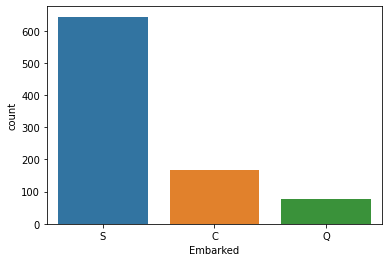

In [10]:
sns.countplot(df_train['Embarked'])
df_train['Embarked'] = df_train['Embarked'].fillna('S',axis=0)

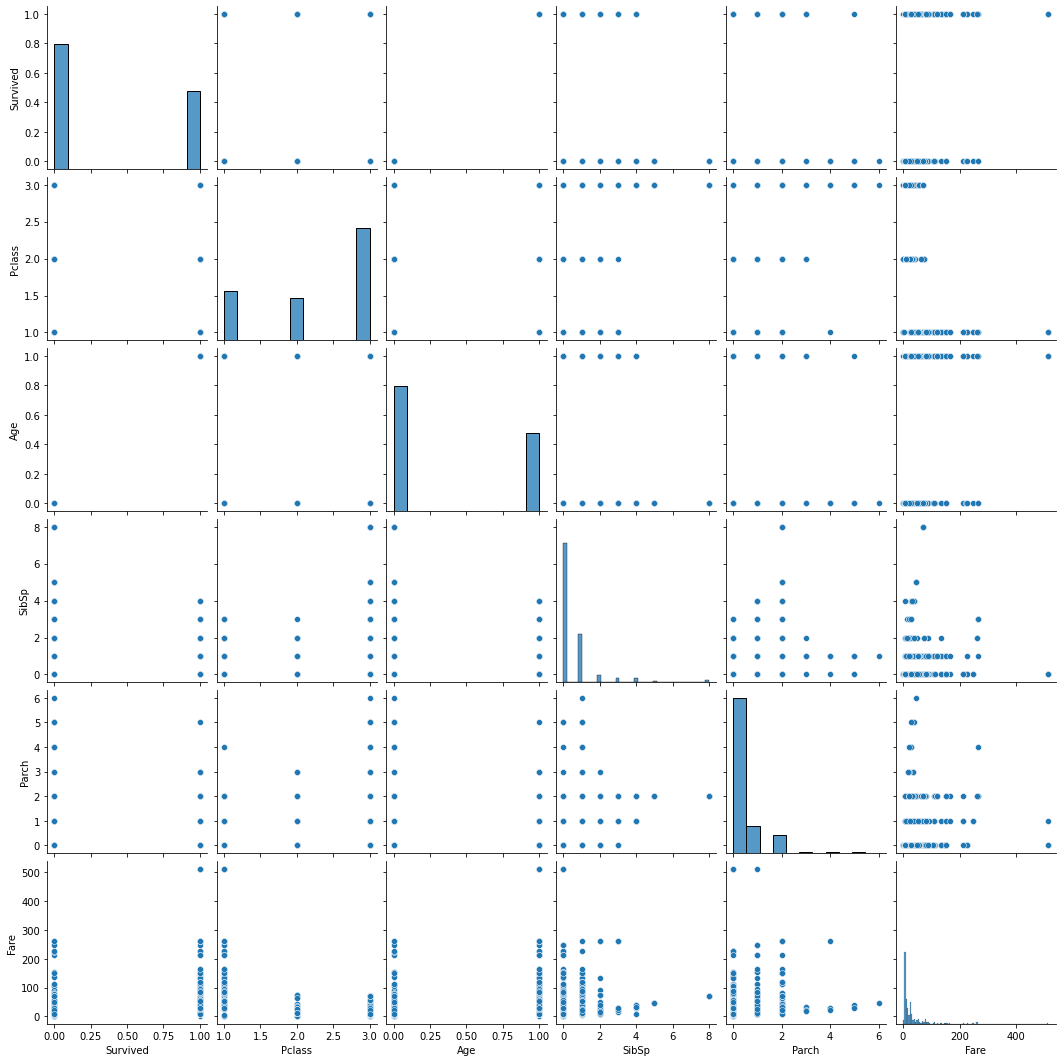

In [11]:
sns.pairplot(df_train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

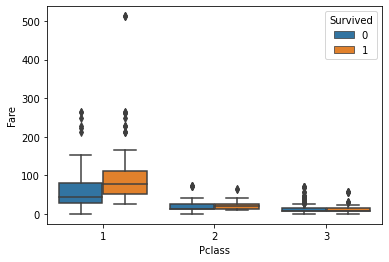

In [12]:
# ax, fig = plt.subplots(1,2)
sns.boxplot(df_train['Pclass'],df_train['Fare'], data= df_train,hue= df_train['Survived'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

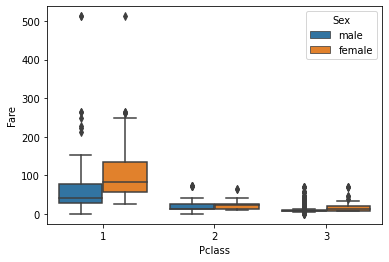

In [13]:
sns.boxplot(df_train['Pclass'],df_train['Fare'], data= df_train,hue= df_train['Sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

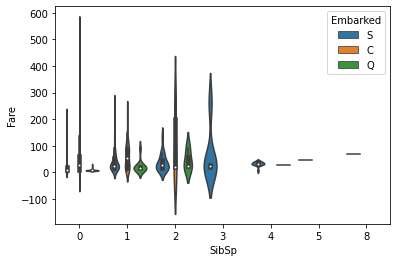

In [14]:
sns.violinplot(df_train['SibSp'],df_train['Fare'], hue = df_train['Embarked'],data = df_train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

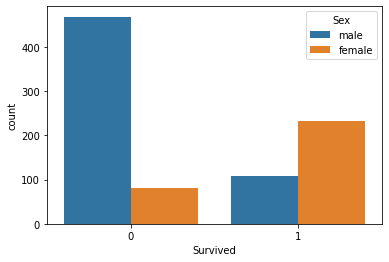

In [15]:
sns.countplot(df_train['Survived'],hue='Sex',data=df_train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

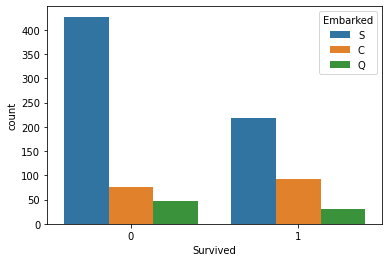

In [16]:
sns.countplot(df_train['Survived'],hue='Embarked',data=df_train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_s

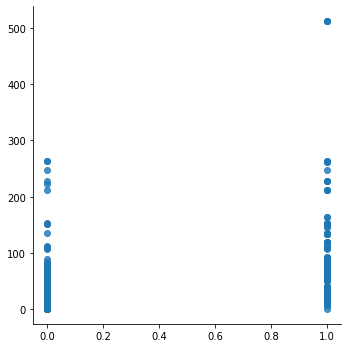

In [17]:
sns.lmplot('Age','Fare',data=df_train,palette='virdis')

In [18]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [19]:
df_test = df_test.drop('Cabin',axis=1)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean(),axis=0)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean(),axis=0)

In [20]:
df_train.shape

(891, 9)

In [21]:
df_test.shape

(418, 8)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label = LabelEncoder()
df_train['Sex'] = label.fit_transform(df_train['Sex'])
df_train['Embarked'] = label.fit_transform(df_train['Embarked'])
df_train['Ticket'] = label.fit_transform(df_train['Ticket'])

In [24]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,0,1,0,523,7.2500,2
1,1,1,0,1,1,0,596,71.2833,0
2,1,3,0,1,0,0,669,7.9250,2
3,1,1,0,1,1,0,49,53.1000,2
4,0,3,1,0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,101,13.0000,2
887,1,1,0,1,0,0,14,30.0000,2
888,0,3,0,0,1,2,675,23.4500,2
889,1,1,1,1,0,0,8,30.0000,0


In [25]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.50000,0,0,330911,7.8292,Q
1,3,female,47.00000,1,0,363272,7.0000,S
2,2,male,62.00000,0,0,240276,9.6875,Q
3,3,male,27.00000,0,0,315154,8.6625,S
4,3,female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,A.5. 3236,8.0500,S
414,1,female,39.00000,0,0,PC 17758,108.9000,C
415,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,30.27259,0,0,359309,8.0500,S


In [26]:
df_test['Sex'] = label.fit_transform(df_test['Sex'])
df_test['Embarked'] = label.fit_transform(df_test['Embarked'])
df_test['Ticket'] = label.fit_transform(df_test['Ticket'])

In [27]:
df_train['Age'] = df_train['Age'].astype('float32')
df_train['Fare'] = df_train['Fare'].astype('float32')
df_train['Pclass'] = df_train['Pclass'].astype('float32')
df_train['Parch'] = df_train['Parch'].astype('float32')
df_train['Sex'] = df_train['Sex'].astype('float32')
df_train['SibSp'] = df_train['SibSp'].astype('float32')
df_train['Ticket'] = df_train['Ticket'].astype('float32')
df_train['Embarked'] = df_train['Embarked'].astype('float32')
df_train['Survived'] = df_train['Survived'].astype('float32')


In [28]:
df_test['Age'] = df_test['Age'].astype('float32')
df_test['Fare'] = df_test['Fare'].astype('float32')
df_test['Pclass'] = df_test['Pclass'].astype('float32')
df_test['Parch'] = df_test['Parch'].astype('float32')
df_test['Sex'] = df_test['Sex'].astype('float32')
df_test['SibSp'] = df_test['SibSp'].astype('float32')
df_test['Ticket'] = df_test['Ticket'].astype('float32')
df_test['Embarked'] = df_test['Embarked'].astype('float32')

In [29]:
y = df_train['Survived']
X = df_train.drop('Survived',axis=1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
predict = rf.predict(X_test)

In [33]:
rf.score(X_train,y_train)

1.0

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
print({'accuracy':accuracy_score(y_test,predict)})

{'accuracy': 1.0}


In [36]:
confusion_matrix(y_test,predict)

array([[157,   0],
       [  0, 111]])

In [37]:
rf.predict(df_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [38]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       157
         1.0       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_predict = tree.predict(X_test)
tree.score(X_train,y_train)

1.0

In [41]:
confusion_matrix(y_test,tree_predict)

array([[157,   0],
       [  0, 111]])

In [42]:
import tensorflow as tf

In [43]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential

In [44]:
model = Sequential()

In [45]:
X_train.shape,y_train.shape

((623, 8), (623,))

In [46]:
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
model.fit(X_train,y_train,epochs=100,verbose=1,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/100
20/20 [==============================] - 1s 34ms/step - loss: 0.5793 - accuracy: 0.6403 - val_loss: 0.7344 - val_accuracy: 0.5858
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.6185 - val_loss: 0.6766 - val_accuracy: 0.5858
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5291 - accuracy: 0.6552 - val_loss: 0.6376 - val_accuracy: 0.5858
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5372 - accuracy: 0.6312 - val_loss: 0.6076 - val_accuracy: 0.5858
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5187 - accuracy: 0.6316 - val_loss: 0.5821 - val_accuracy: 0.5858
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5067 - accuracy: 0.6457 - val_loss: 0.5596 - val_accuracy: 0.5896
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.6337 - val_loss: 0.5392 - val_accuracy: 0.5970
Epoch 8/100


In [48]:
result = pd.DataFrame(model.history.history)

<AxesSubplot:>

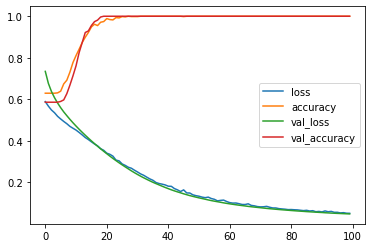

In [49]:
result.plot()

In [50]:
for i in model.predict(df_test):
    if i > 0.5:
        print('Survived')
    else:
        print('Not Survived')

Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
Survived
S